# Decision Tree & Random Forest

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [9]:
#loading in building-level file

url = 'https://raw.githubusercontent.com/wshenyc/MLForCities/main/Data/building_data_final.csv'
df = pd.read_csv(url)

In [10]:
#158,185 rows corresponding to a unique building based on Borough, Block, Lot (BBL)
#116 columns 
df.shape

(158185, 115)

In [11]:
df

,bbl,county,res_units,other_units,buildings,basement_code,lot_area,comp_bbl_2017,comp_bbl_2018,comp_bbl_2019,...,building_class_W3,building_class_W4,building_class_W6,building_class_W7,building_class_W8,building_class_W9,building_class_Y4,building_class_Z4,building_class_Z9,outcome
0,3047940001,47,4,3,2,5,4000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,3047940017,47,3,0,1,2,2000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,3047940078,47,3,0,1,2,1400,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,2032790058,5,6,0,1,5,2703,0.000000,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,1011980126,61,7,0,1,1,1916,0.000000,1.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158180,1011980055,61,3,0,1,1,1839,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
158181,2039340058,5,3,0,1,5,2700,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
158182,3087140010,47,46,0,1,0,10000,13.673913,14.173913,0.521739,...,0,0,0,0,0,0,0,0,0,1
158183,2027860012,5,21,0,1,2,6476,0.047619,1.047619,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [12]:
#of the 158,185 buildings, about 12% of buildings incurred a Class C HPD violation in 2021

df['outcome'].mean()

0.125858962607074

In [13]:
df.set_index('bbl', inplace=True)
df.head()

,county,res_units,other_units,buildings,basement_code,lot_area,comp_bbl_2017,comp_bbl_2018,comp_bbl_2019,comp_bbl_2020,...,building_class_W3,building_class_W4,building_class_W6,building_class_W7,building_class_W8,building_class_W9,building_class_Y4,building_class_Z4,building_class_Z9,outcome
bbl,,,,,,,,,,,,,,,,,,,,,
3047940001,47,4,3,2,5,4000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3047940017,47,3,0,1,2,2000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3047940078,47,3,0,1,2,1400,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2032790058,5,6,0,1,5,2703,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1011980126,61,7,0,1,1,1916,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### 1a) Decision Tree

In [14]:
X = df.loc[:, "res_units":"building_class_Z9"]
y = df.loc[:, 'outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

dt = DecisionTreeClassifier(max_depth=10, random_state = 99)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)

# accuracy is high
accuracy= (y_predict == y_test).value_counts(normalize=True)[True]
accuracy

0.9553270397842212

In [17]:
pred_prob_all_bld= pd.DataFrame(dt.predict_proba(df.loc[:, "res_units":"building_class_Z9"])[:, 1],
                                        columns = ["prob_vio_dt"],index=df.index)
pred_prob_all_bld

,prob_vio_dt
bbl,
3047940001,0.060268
3047940017,0.001839
3047940078,0.001839
2032790058,0.157187
1011980126,0.011708
...,...
1011980055,0.001839
2039340058,0.001839
3087140010,0.947761


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,11),'criterion':['gini','entropy']}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

{'criterion': 'entropy', 'max_depth': 6}
0.9743728425564925


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,11),'criterion':['gini','entropy']}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

{'criterion': 'entropy', 'max_depth': 7}
0.9742908917283555


In [23]:
dt = DecisionTreeClassifier(max_depth=7,criterion='entropy')
rs=dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
accuracy= (y_predict == y_test).value_counts(normalize=True)[True]
accuracy

0.9580032029669588

In [24]:
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

0.9745815016152172


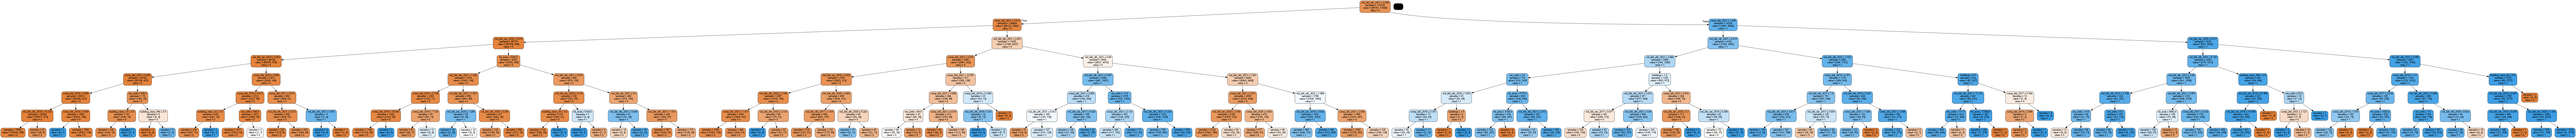

In [25]:
# your code here
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train,y_train)

from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

### 1b) Random Forests

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1, max_depth = 6, random_state = 99)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

#slightly higher accuracy than decision tree
print(roc_auc_score(y_test,pred))

0.9716809802448287


In [28]:
#adding the rf probabilities

pred_prob_all_bld = pd.DataFrame(rf.predict_proba(df.loc[:, "res_units":"building_class_Z9"])[:, 1],
                                        columns = ["prob_vio_rf"],index=df.index)

pred_prob_all_bld

,prob_vio_rf
bbl,
3047940001,0.139565
3047940017,0.013437
3047940078,0.014047
2032790058,0.170749
1011980126,0.058133
...,...
1011980055,0.013437
2039340058,0.014494
3087140010,0.695569


In [20]:
#writing csv for dt and rf's probabilities 
#pred_prob_all_bld.to_csv("pred_prob_dt_rf.csv",index=False)

In [29]:
param_grid = {'n_estimators':range(1,70,5)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=20)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_params_)

{'n_estimators': 11}


In [30]:
param_grid = {'n_estimators':range(1,70,5)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=20)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_params_)

{'n_estimators': 31}


In [31]:
rf = RandomForestClassifier(n_estimators=31, n_jobs=-1, max_depth = 6, random_state = 99)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
#slightly higher accuracy than decision tree
print(roc_auc_score(y_test,pred))

0.9712699388337189


In [33]:
param_grid = {'n_estimators':range(1,70,5),'max_depth':range(1,11)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=20)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_params_)

{'max_depth': 8, 'n_estimators': 51}


In [35]:
rf = RandomForestClassifier(n_estimators=51, n_jobs=-1, max_depth = 8, random_state = 99)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

#slightly higher accuracy than decision tree
print(roc_auc_score(y_test,pred))

0.974180871534134


In [41]:
param_grid = {'bootstrap': [True],'max_depth': range(1,11),'max_features': ['auto', 'log2'], 'n_estimators': range(1,70,5)}
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train);
print(g_search.best_params_)


{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 61}


In [42]:
rf = RandomForestClassifier(n_estimators=26, n_jobs=-1, max_depth = 10, random_state = 99)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred))

0.9750807564149747
